# Zadanie 1
Dane zawierają informacje na temat spożycia alkoholu wśród portugalskojęzycznych studentów. 

Przedstaw na wykresie rozrzutu, relację między spożyciem alkoholu w tygodniu (G1) a wiekiem (Age). Dodatkowo, osobnymi kolorami zaznacz w wykresie osoby który rodzice mają ten sam poziom wykształcenia (medu – wykształcenie matki, fedu – wykształcenie ojca).

Dodaj linię trendu do wykresu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from plotly.subplots import make_subplots


df = pd.read_csv('datasets/PAD_04_PD.csv')

def same_education_of_parents(x):
    if x['Medu'] == x['Fedu']:
        return True
    else:
        return False

df['same education of parents'] = df.apply(same_education_of_parents, axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,same education of parents
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,True


In [2]:
fig = px.scatter(df, x='age', y='G1', color='same education of parents', trendline='ols')
fig.show()

# Zadanie 2
Przedstaw histogram wieku osobno dla kobiet i mężczyzn.

Text(0.5, 1.0, 'Mężczyźni')

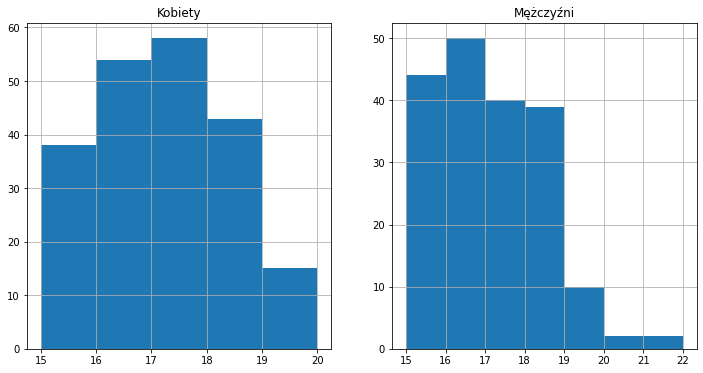

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df['age'][df['sex'] == 'F'].hist(bins=5, ax=axes[0])
df['age'][df['sex'] == 'M'].hist(bins=7, ax=axes[1])
axes[0].set_title('Kobiety')
axes[1].set_title('Mężczyźni')

# Zadanie 3
Kolumna FamSize ma dwie wartości LE3 – 3 lub mniej, GT3 3 – więcej niż 3. Przedstaw za pomocą wykresu słupkowego jak wygląda średnia konsumpcja alkoholu (G1), w podziale na płeć, w obdwu grupach wydzielonych ze względu na FamSize.

In [6]:
LE3_df = df[['sex', 'famsize','G1']][df.famsize == 'LE3']
GT3_df = df[['sex', 'famsize','G1']][df.famsize == 'GT3']

LE3_df.groupby('sex').mean()

,G1
sex,
F,11.288462
M,11.274194


In [7]:

fig = make_subplots(rows=1, cols=2)

fig1 = px.bar(data_frame=LE3_df.groupby('sex').mean(), x=LE3_df.groupby('sex').mean().index, y='G1', title='Spożycie alkoholu dla wartości LE3')
fig2 = px.bar(data_frame=GT3_df.groupby('sex').mean(), x=GT3_df.groupby('sex').mean().index, y='G1', title='Spożycie alkoholu dla wartości GT3')
fig2.update_traces(marker_color='green')

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.update_layout(title='Spożycie alkoholu dla rodziny - niebieski wykres dla wartości LE3, zielony dla GT3')
fig.show()
